# 13_MiniAlexNet-Supervised-SBATCH

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.load_MNIST import load_MNIST

from src.training_results import CNNSupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [5]:
train_dataloader, val_dataloader, test_dataloader = load_MNIST(
    root='./data', subset_frac=0.05, 
    batch_size=32, validation_ratio=6, seed=42
)

In [6]:
total_size = 320

# Quick runs

```bash
$ sbatch sbatch_scripts/13_activity-prune_CNN_fast_MNIST.sh 
Submitted batch job 57014938 # GPU run
$ sbatch sbatch_scripts/13_random-prune_CNN_fast_MNIST.sh 
Submitted batch job 56961678
$ sbatch sbatch_scripts/13_no-prune_CNN_fast.sh 
Submitted batch job 56942275
```

## No Prune

In [4]:
no_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/no_prune_CNN_fast/sbatch-56942275_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

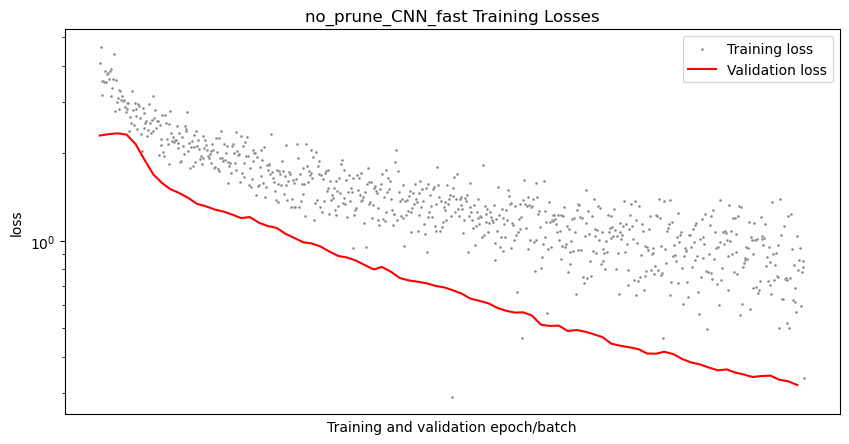

In [5]:
no_prune_results.plot_training_losses()

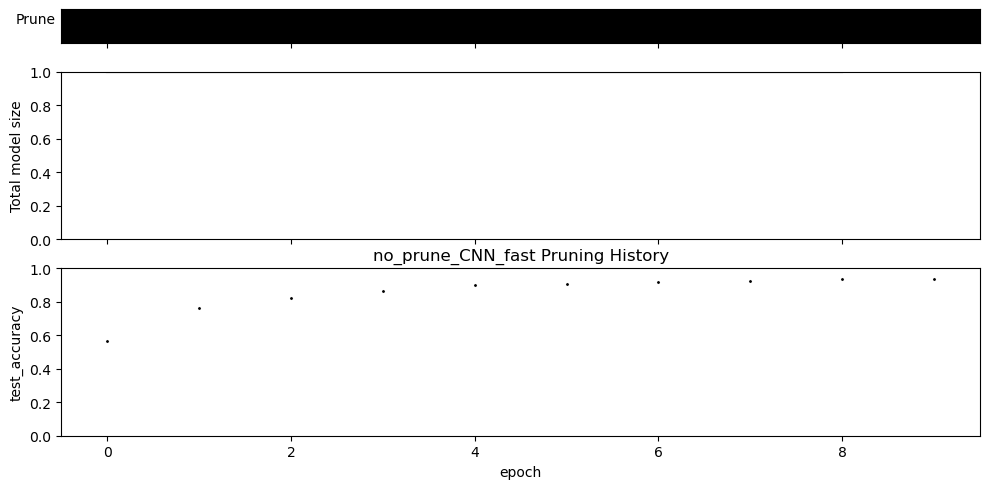

In [16]:
fig, ax = no_prune_results.plot_pruning(norm_size=total_size)

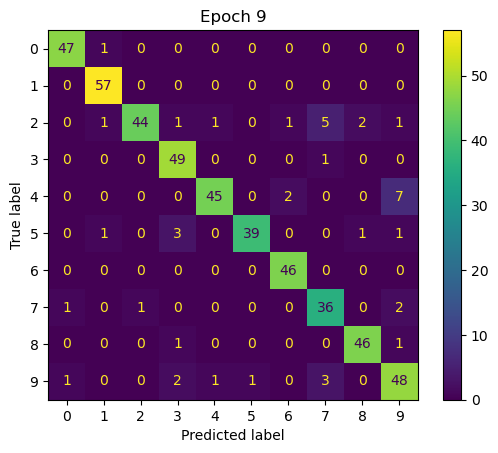

In [10]:
no_prune_results.set_trained_model(9)
no_prune_results.plot_confusion_matrix(test_dataloader)

## Random

In [29]:
random_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/random_prune_CNN_fast/sbatch-56961678_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-Random_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'random_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

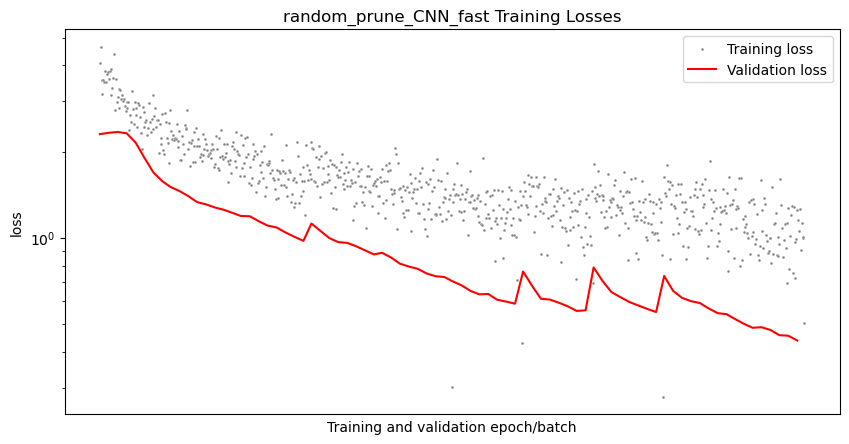

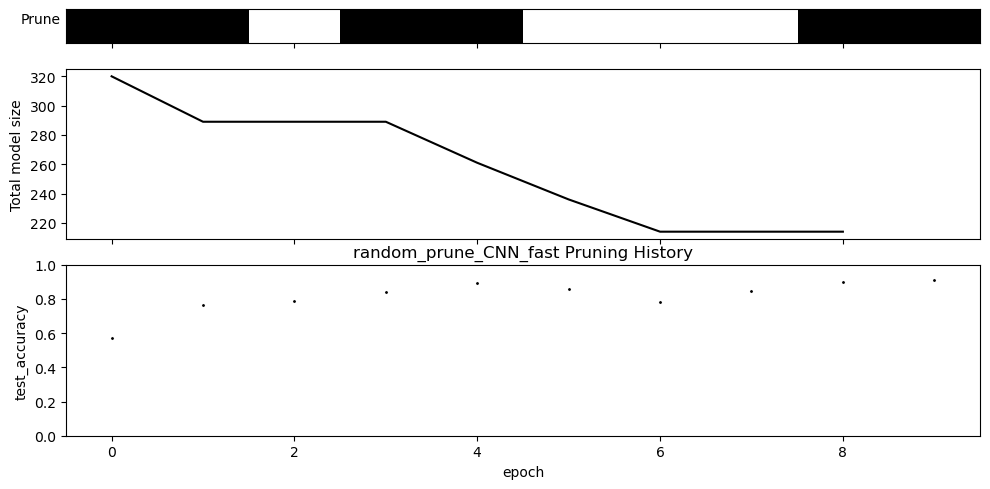

In [30]:
random_prune_results.plot_training_losses()
random_prune_results.plot_pruning()

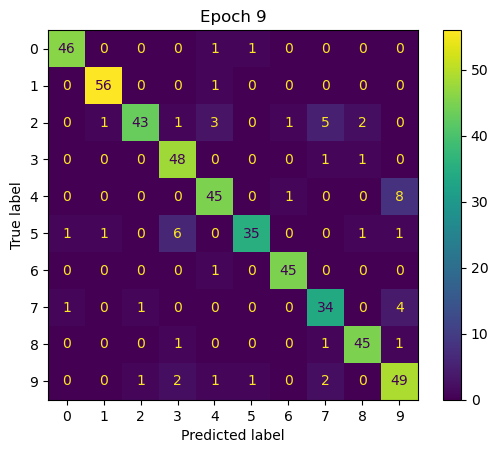

In [32]:
random_prune_results.set_trained_model(9)
random_prune_results.plot_confusion_matrix(test_dataloader)

## Activity prune

In [13]:
# activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/activity_prune_CNN_fast/sbatch-56961381_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")
activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/activity_prune_CNN_fast/sbatch-c_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")

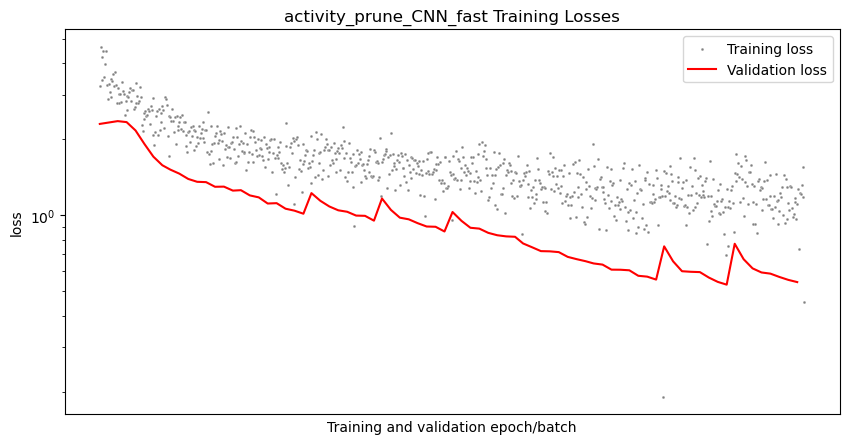

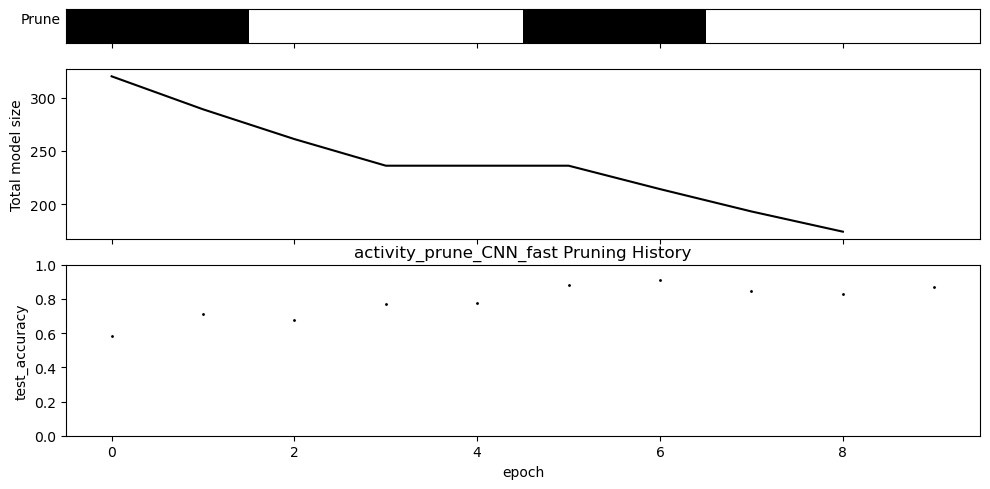

In [14]:
fig, ax = activity_prune_results.plot_training_losses()
fig, ax = activity_prune_results.plot_pruning()

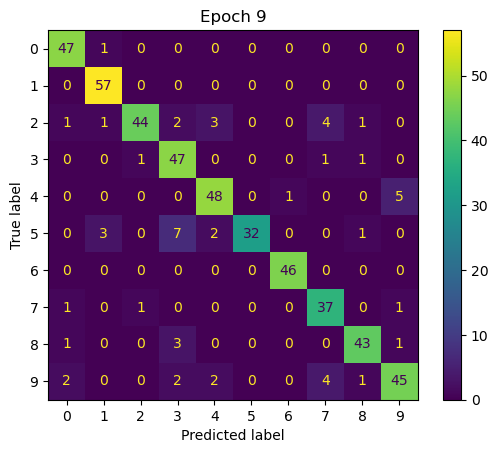

In [15]:
activity_prune_results.set_trained_model(9)
activity_prune_results.plot_confusion_matrix(test_dataloader)

# Full results

```bash
$ sbatch sbatch_scripts/13_activity-prune_CNN_full_MNIST.sh 
Submitted batch job 57016329
$ sbatch sbatch_scripts/13_random-prune_CNN_full_MNIST.sh 
Submitted batch job 57016337
$ sbatch sbatch_scripts/13_no-prune_CNN_full.sh 
Submitted batch job 57016361
```

In [8]:
# full_no_prune_results = CNNSupervisedTrainingResults()
# full_random_prune_results = CNNSupervisedTrainingResults()
full_activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/activity_prune_CNN_full/sbatch-57011005_ds-MNIST_ic-1_bs-32_sf-0.1_vr-6_nti-250_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

## No Pruning

In [ ]:
fig, ax = full_no_prune_results.plot_training_losses()
fig, ax = full_no_prune_results.plot_pruning()

In [ ]:
full_no_prune_results.set_trained_model(9)
full_no_prune_results.plot_confusion_matrix(test_dataloader)

## Random

In [ ]:
fig, ax = full_random_prune_results.plot_training_losses()
fig, ax = full_random_prune_results.plot_pruning()

In [ ]:
full_random_prune_results.set_trained_model(9)
full_random_prune_results.plot_confusion_matrix(test_dataloader)

## Activity

In [2]:
fig, ax = full_activity_prune_results.plot_training_losses()
fig, ax = full_activity_prune_results.plot_pruning()

NameError: name 'full_activity_prune_results' is not defined

In [ ]:
full_activity_prune_results.set_trained_model(9)
full_activity_prune_results.plot_confusion_matrix(test_dataloader)